In [4]:
from google.colab import files

# ZIP dosyasını yükle (örneğin: archive.zip)
uploaded = files.upload()


Saving archive.zip to archive (1).zip


In [5]:
import zipfile
import os

# ZIP dosyasının adını burada kullan
zip_path = "archive.zip"

# "unzipped_data" klasörüne çıkart
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("unzipped_data")

# Çıkarılan dosyaları yazdır
for root, dirs, files in os.walk("unzipped_data"):
    for name in files:
        print(os.path.join(root, name))



unzipped_data/turkey_earthquakes(1915-2023_may).csv


In [10]:

df = pd.read_csv("unzipped_data/turkey_earthquakes(1915-2023_may).csv")  # ← Bu yolu doğru dosya adıyla güncelle
df.head()

,No,Deprem Kodu,Olus tarihi,Olus zamani,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb,Tip,Yer
0,1,20230430130127,2023.04.30,13:01:27.69,38.3392,37.7633,8.7,4.3,0.0,4.3,4.3,0.0,0.0,Ke,KEPEZ-AKCADAG (MALATYA) [East 1.7 km]
1,2,20230430040253,2023.04.30,04:02:53.49,40.8077,31.0708,3.7,3.5,0.0,3.5,3.4,0.0,0.0,Ke,PASAKONAGI- (DUZCE) [South West 0.9 km]
2,3,20230430025122,2023.04.30,02:51:22.15,35.6422,34.0252,22.4,3.5,0.0,3.5,3.5,0.0,0.0,Ke,AKDENIZ
3,4,20230429194832,2023.04.29,19:48:32.87,37.8623,36.2185,5.0,4.0,0.0,3.9,4.0,0.0,0.0,Ke,KARAKUYU-SAIMBEYLI (ADANA) [East 1.4 km]
4,5,20230429175829,2023.04.29,17:58:29.20,38.0220,36.4457,5.0,3.7,0.0,3.7,3.4,0.0,0.0,Ke,YIRICEK-GOKSUN (KAHRAMANMARAS) [North West 2....


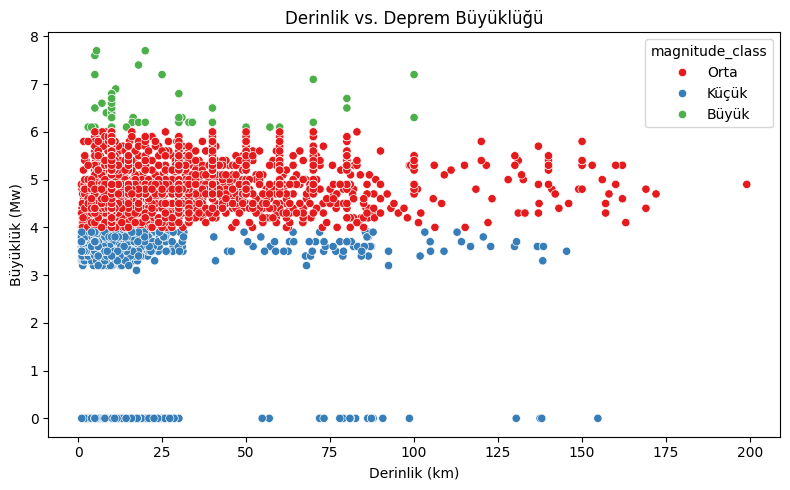

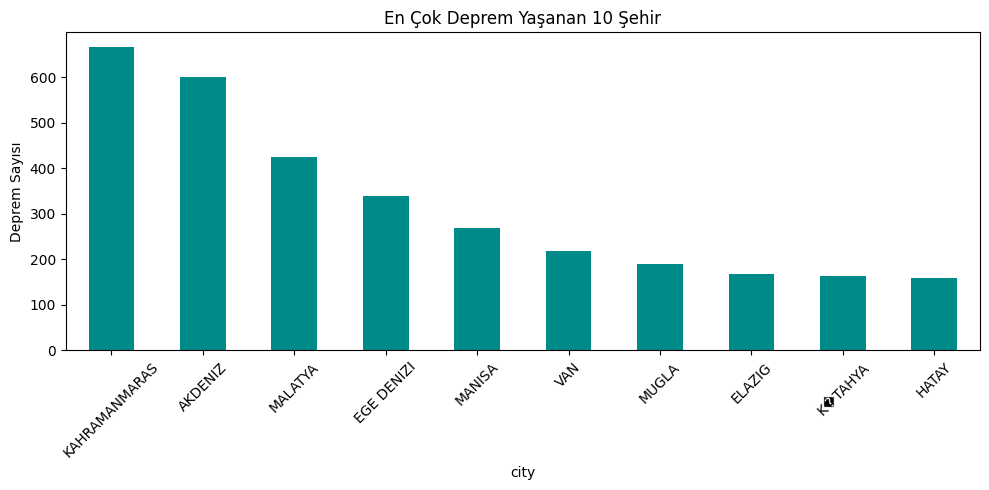


=== Random Forest Sınıflandırma Raporu ===
              precision    recall  f1-score   support

       Büyük       0.00      0.00      0.00        15
       Küçük       0.68      0.77      0.72       872
        Orta       0.71      0.62      0.66       845

    accuracy                           0.69      1732
   macro avg       0.46      0.46      0.46      1732
weighted avg       0.69      0.69      0.69      1732



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== KNN Sınıflandırma Raporu ===
              precision    recall  f1-score   support

       Büyük       0.00      0.00      0.00        15
       Küçük       0.67      0.74      0.70       872
        Orta       0.69      0.62      0.65       845

    accuracy                           0.67      1732
   macro avg       0.45      0.45      0.45      1732
weighted avg       0.67      0.67      0.67      1732


=== Decision Tree Sınıflandırma Raporu ===
              precision    recall  f1-score   support

       Büyük       0.00      0.00      0.00        15
       Küçük       0.67      0.68      0.67       872
        Orta       0.65      0.64      0.65       845

    accuracy                           0.66      1732
   macro avg       0.44      0.44      0.44      1732
weighted avg       0.65      0.66      0.65      1732



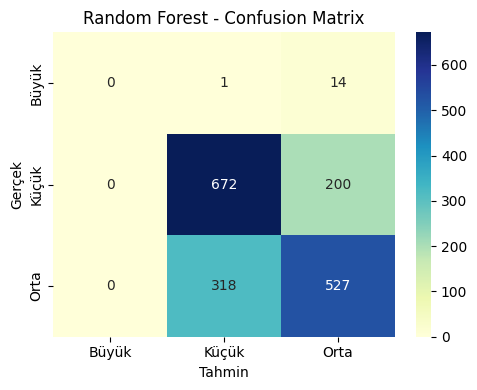

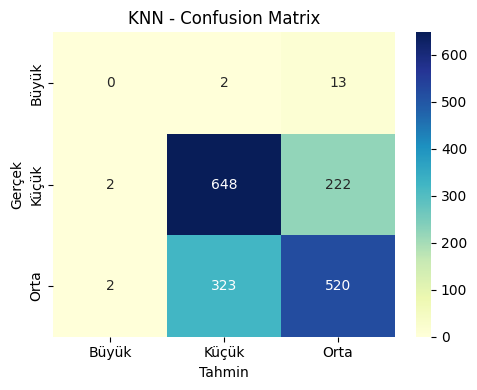

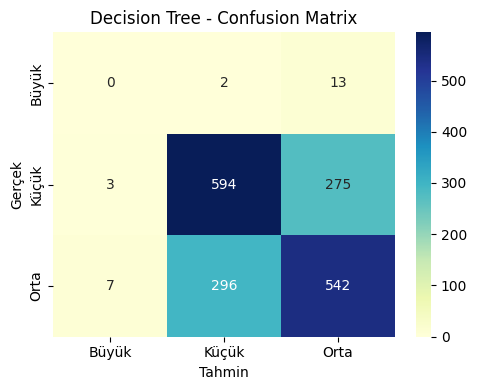


=== Model Performans Özeti ===
               F1_macro_mean  F1_macro_std
Random Forest       0.468239      0.004700
KNN                 0.444570      0.003744
Decision Tree       0.439606      0.018037

 En iyi ortalama F1 skoru 'Random Forest' modeline aittir.
 En düşük ortalama F1 skoru 'Decision Tree' modeline aittir.

 Yorum:
• Random Forest modeli, sınıflar arasında daha dengeli bir performans göstermiştir ve özellikle veri dengesizliğine rağmen başarılı sonuçlar üretmiştir.
• Decision Tree modeli ise sınıflandırma başarısı açısından diğer modellere göre daha zayıf kalmıştır. Bu model, özellikle 'Orta' sınıf gibi sınır değerlerde daha fazla hata yapmıştır.


In [9]:
# Gelişmiş Türkiye Deprem Analizi Projesi

# Gerekli kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# --- 1. VERİYİ YÜKLE ---
df = pd.read_csv("unzipped_data/turkey_earthquakes(1915-2023_may).csv")

# --- 2. VERİ TEMİZLEME ---
df_clean = df[["Olus tarihi", "Olus zamani", "Enlem", "Boylam", "Derinlik", "Mw", "Yer"]].copy()
df_clean.columns = ["date", "time", "latitude", "longitude", "depth_km", "magnitude", "location"]
df_clean.dropna(subset=["magnitude"], inplace=True)

df_clean["datetime"] = pd.to_datetime(df_clean["date"] + " " + df_clean["time"], errors='coerce')
df_clean["year"] = df_clean["datetime"].dt.year

def magnitude_class(mag):
    if mag < 4.0:
        return "Küçük"
    elif mag <= 6.0:
        return "Orta"
    else:
        return "Büyük"

df_clean["magnitude_class"] = df_clean["magnitude"].apply(magnitude_class)

# --- 3. KEŞİFSEL ANALİZ ---
# Harita (ilk 500 deprem)
map = folium.Map(location=[39.0, 35.0], zoom_start=6)
for _, row in df_clean.head(500).iterrows():
    folium.CircleMarker(
        location=(row["latitude"], row["longitude"]),
        radius=row["magnitude"] * 0.8,
        popup=f"{row['location']} - {row['magnitude']}",
        color="crimson" if row["magnitude"] >= 6 else "blue",
        fill=True, fill_opacity=0.6
    ).add_to(map)
map.save("deprem_haritasi.html")

# Derinlik vs Büyüklük
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_clean, x="depth_km", y="magnitude", hue="magnitude_class", palette="Set1")
plt.title("Derinlik vs. Deprem Büyüklüğü")
plt.xlabel("Derinlik (km)")
plt.ylabel("Büyüklük (Mw)")
plt.tight_layout()
plt.show()

# En çok deprem yaşanan şehirler
df_clean["city"] = df_clean["location"].str.extract(r"\(([^)]+)\)", expand=False)
top_cities = df_clean["city"].value_counts().head(10)
top_cities.plot(kind="bar", figsize=(10,5), color="darkcyan")
plt.title("En Çok Deprem Yaşanan 10 Şehir")
plt.ylabel("Deprem Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 4. MODELLEME ---
features = df_clean[["latitude", "longitude", "depth_km"]]
target = df_clean["magnitude_class"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, stratify=target, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Random Forest": RandomForestClassifier(random_state=42, class_weight="balanced"),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight="balanced")
}

results = {}
conf_matrices = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n=== {name} Sınıflandırma Raporu ===")
    print(classification_report(y_test, y_pred))
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1_macro')
    results[name] = {
        "F1_macro_mean": scores.mean(),
        "F1_macro_std": scores.std()
    }

# --- 5. KARMAŞIKLIK MATRİSLERİ ---
for name, cm in conf_matrices.items():
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu",
                xticklabels=models["Random Forest"].classes_,
                yticklabels=models["Random Forest"].classes_)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Tahmin")
    plt.ylabel("Gerçek")
    plt.tight_layout()
    plt.show()

# --- 6. MODEL PERFORMANS ÖZETİ ---
results_df = pd.DataFrame(results).T
print("\n=== Model Performans Özeti ===")
print(results_df)

# --- SONUÇLARIN YORUMLANMASI ---
best_model = results_df["F1_macro_mean"].idxmax()
worst_model = results_df["F1_macro_mean"].idxmin()

print(f"\n En iyi ortalama F1 skoru '{best_model}' modeline aittir.")
print(f" En düşük ortalama F1 skoru '{worst_model}' modeline aittir.")

print("\n Yorum:")
print(f"• {best_model} modeli, sınıflar arasında daha dengeli bir performans göstermiştir ve "
      f"özellikle veri dengesizliğine rağmen başarılı sonuçlar üretmiştir.")
print(f"• {worst_model} modeli ise sınıflandırma başarısı açısından diğer modellere göre daha zayıf kalmıştır. "
      "Bu model, özellikle 'Orta' sınıf gibi sınır değerlerde daha fazla hata yapmıştır.")